# Pima Indians Diabetes Database


In [82]:
#Importing libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier


In [4]:
#downloading 
df = pd.read_csv("diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [78]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0.0,33.6,0.627,50,1
1,1,85,66,29,0.0,26.6,0.351,31,0
2,8,183,64,0,0.0,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [6]:
df.shape

(768, 9)

#### Data Cleaning and Preprocessing

In [7]:
int(df[df.duplicated()].sum().sum())
#We do not have any dublicates

0

In [8]:
#dublicates
print(f"There are {len(df[df.duplicated()])} duplicates and {df.isnull().sum().sum()} missing values")


There are 0 duplicates and 0 missing values


In [9]:
#outliers
z_scores = stats.zscore(df[['Insulin']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
# df_no_outliers = df[filtered_entries]
outliers = (abs_z_scores >= 3).any(axis=1)
df[outliers]

#based on scatterplots i decided to impute only extreme outlier for Skin Thickness
# df.loc[df['SkinThickness'] > 80, 'SkinThickness'] = df["SkinThickness"].median()
# df[df['SkinThickness'] > 80]
#we imputed it with median 

#Insulin
df.loc[df['Insulin'] >= 400, 'Insulin'] = df["Insulin"].median()
df[df['Insulin'] >= 400]

/var/folders/z9/z0cpycpj6fn83wyqsf978bg00000gn/T/ipykernel_18627/812940341.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '30.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Insulin'] >= 400, 'Insulin'] = df["Insulin"].median()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


#### Exploratory Data Analysis

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,66.666667,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,86.426761,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.750000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,116.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,392.000000,67.100000,2.420000,81.000000,1.000000


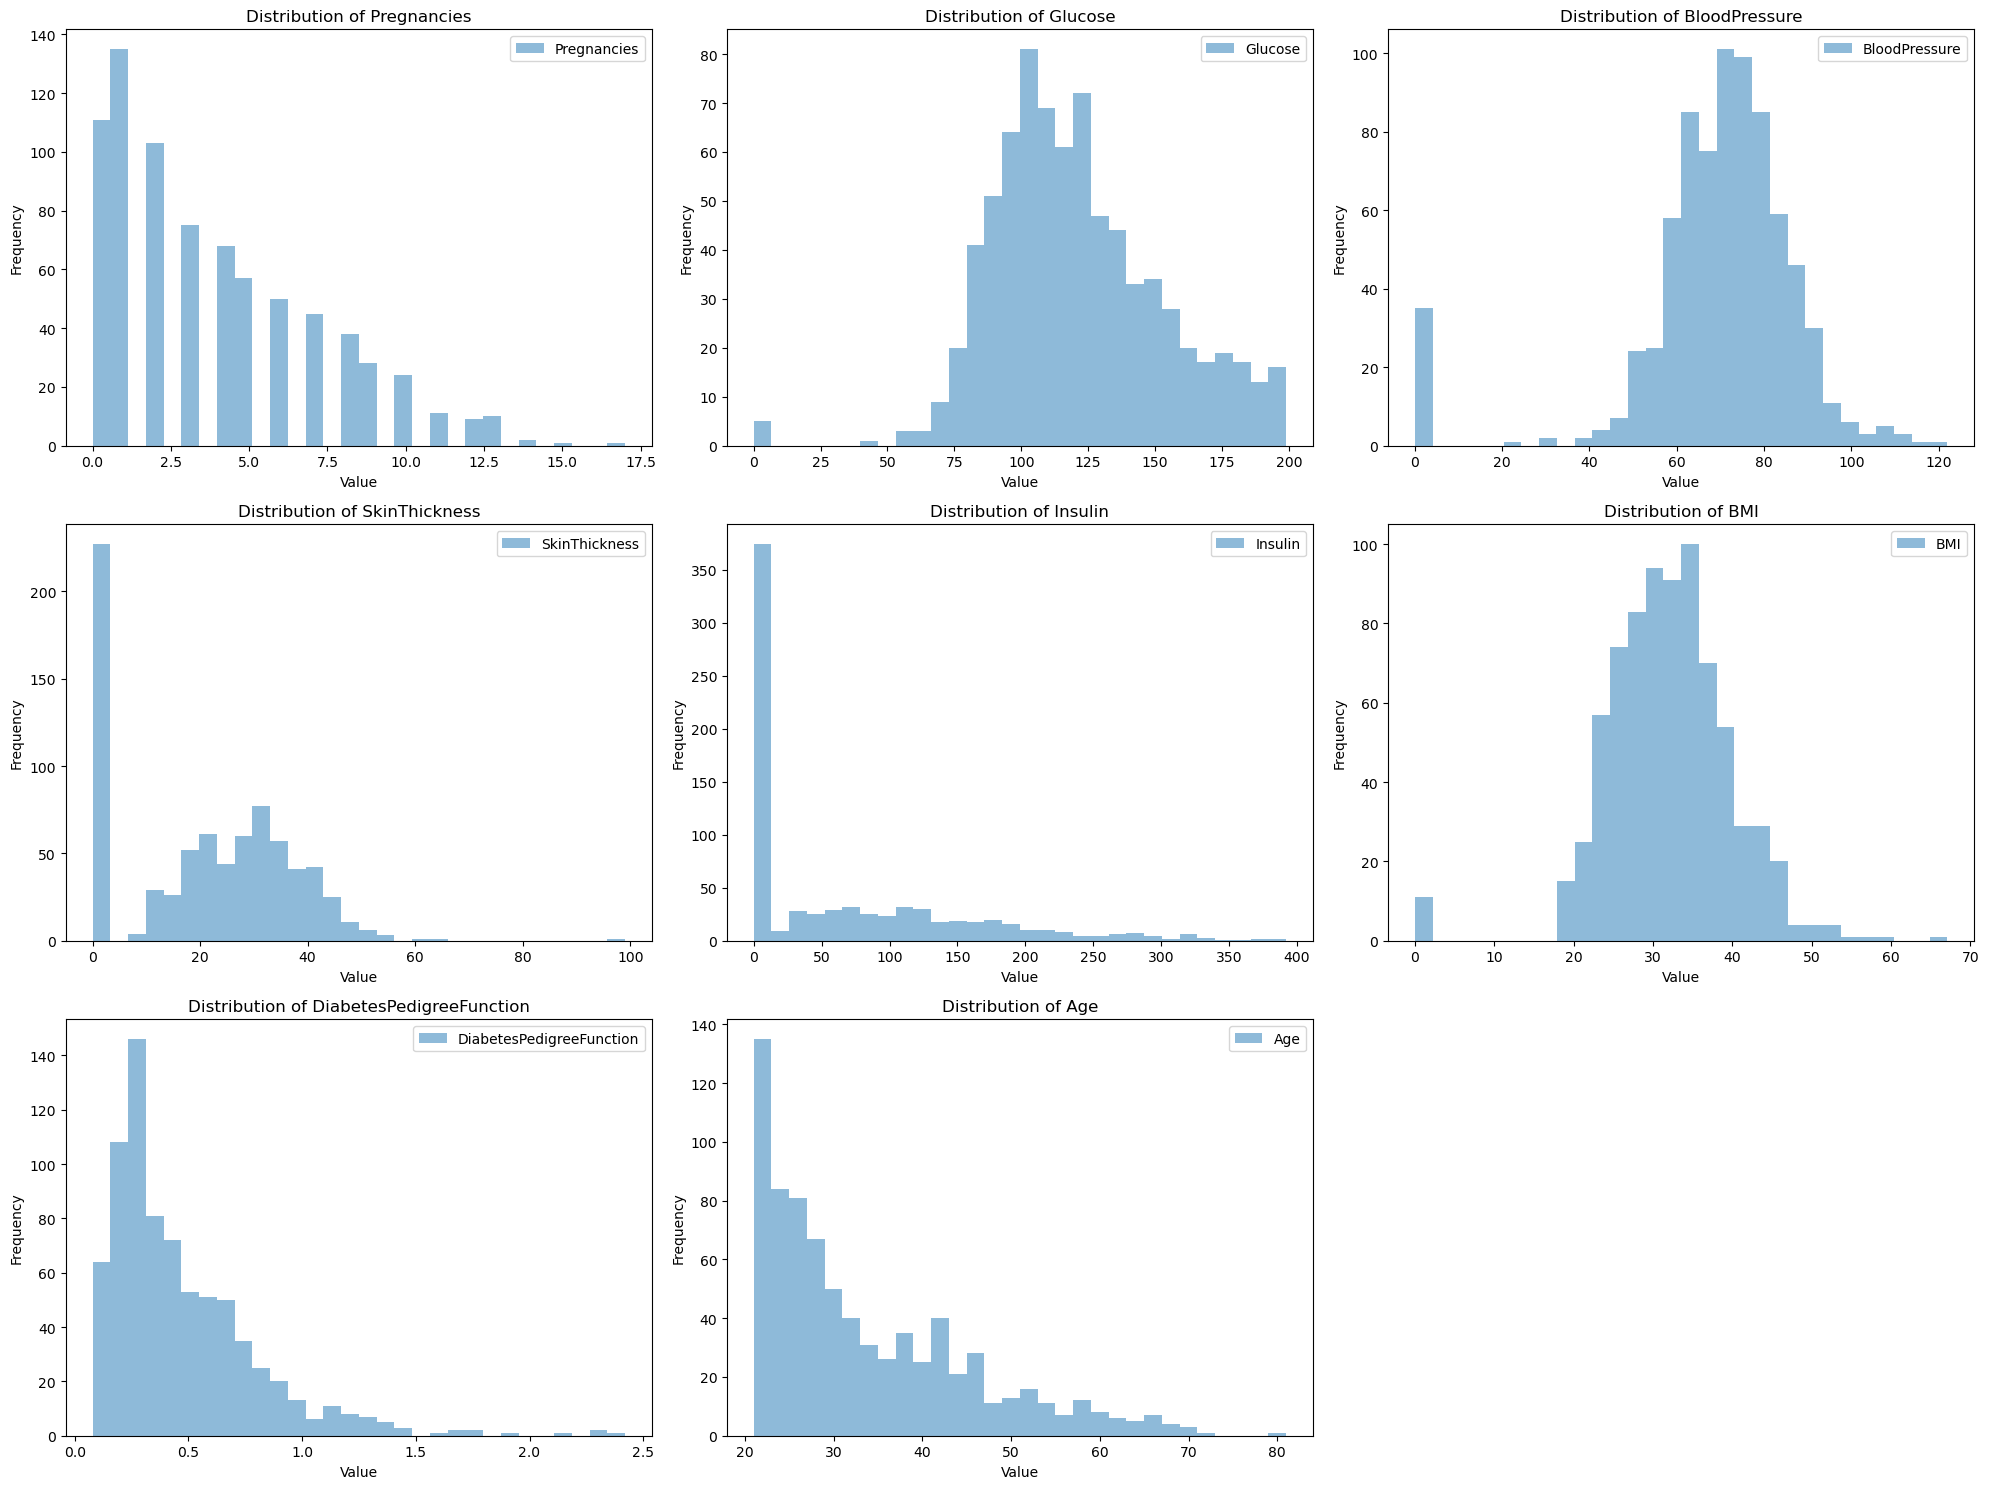

In [11]:
plt.figure(figsize = (20,15))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)  # Create subplots in a 2x2 grid
    plt.hist(df[column], bins=30, alpha=0.5, label=column)  # Plot histogram for each column
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

#### From distribution plots we can see that the outliers in different columns and it is interesting if there is correlation between for example 0 skin thickness and having a diabetes, also why do we have BMI of 0 in the distributions, we gotta check all that things

In [12]:
#Pregnancies 
df.loc[df['Pregnancies'] > 15]
#Can you imagine that this woman was pregnant 17 times, we got to check correlation between number of pregnancies and risk of having a diabetes


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
159,17,163,72,41,114.0,40.9,0.817,47,1


In [13]:
#Glucose
#Distribution of glucose looks normal and indeed normal amount of glucose for people is between 75 and 100 mg/dl

In [14]:
#Blood pressure 
df.iloc[(df.iloc[:, 2] == 0).values].head(3)
#Same thing as with BMI, looks like 0 was imputed on missing values place and the same implies for insulin, skin thickness 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0.0,35.3,0.134,29,0
15,7,100,0,0,0.0,30.0,0.484,32,1
49,7,105,0,0,0.0,0.0,0.305,24,0


In [15]:
#BMI
df[df["BMI"]==0]
# I think that 0 BMI means that it was a missing value and 0 was imputed because obese people have much higher risk having type 2 diabetes, so 0 does not impact cases when the data was not presented

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0.0,0.0,0.232,54,1
49,7,105,0,0,0.0,0.0,0.305,24,0
60,2,84,0,0,0.0,0.0,0.304,21,0
81,2,74,0,0,0.0,0.0,0.102,22,0
145,0,102,75,23,0.0,0.0,0.572,21,0
371,0,118,64,23,89.0,0.0,1.731,21,0
426,0,94,0,0,0.0,0.0,0.256,25,0
494,3,80,0,0,0.0,0.0,0.174,22,0
522,6,114,0,0,0.0,0.0,0.189,26,0
684,5,136,82,0,0.0,0.0,0.640,69,0


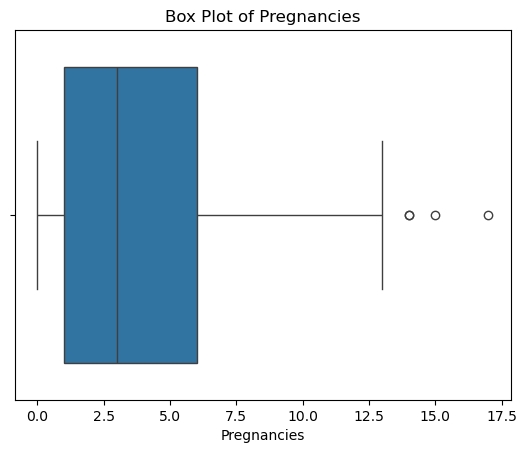

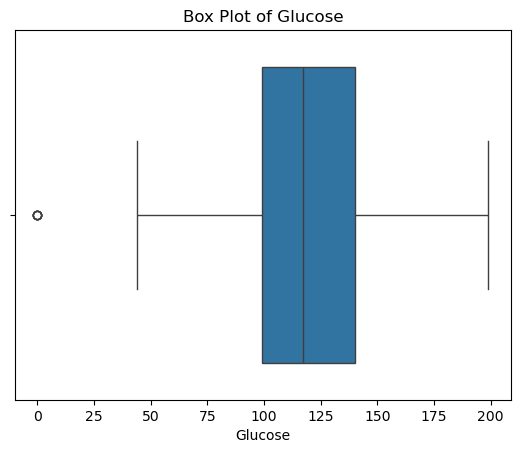

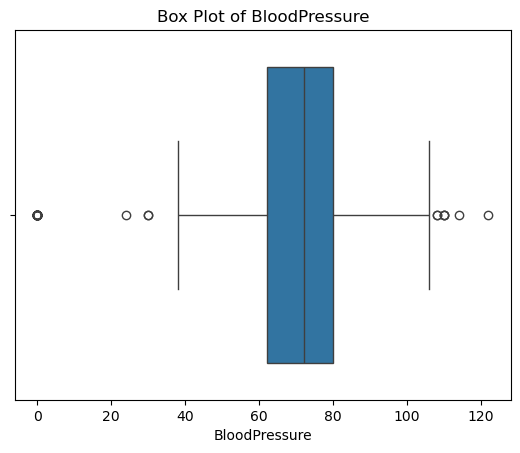

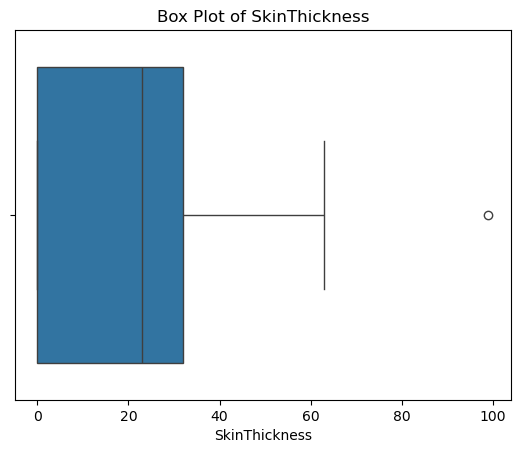

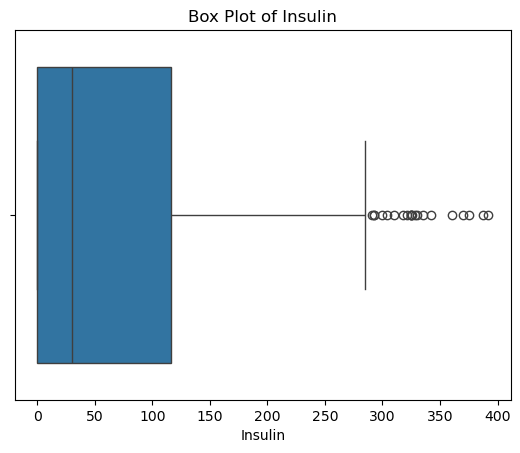

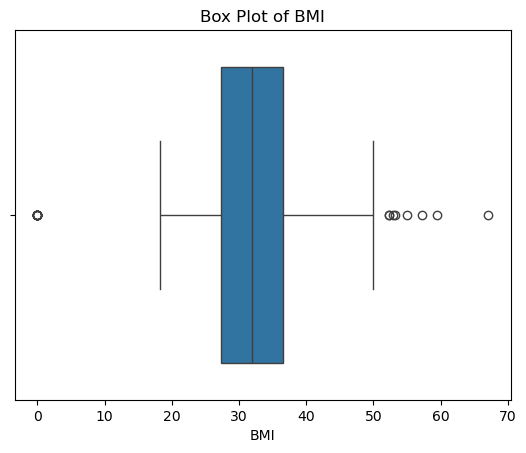

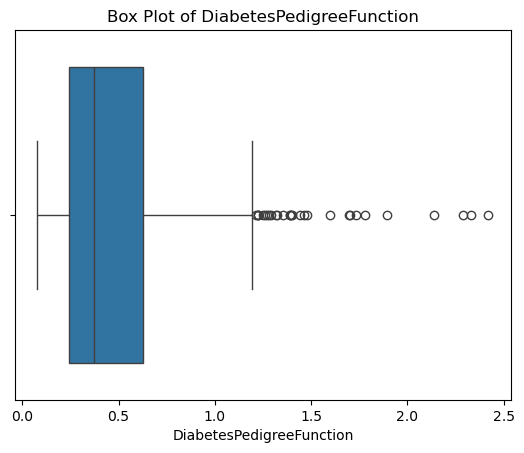

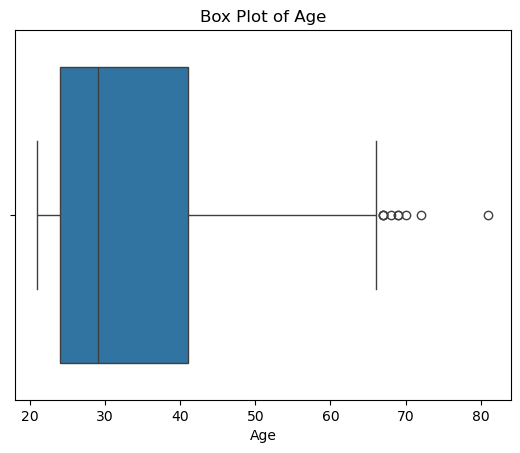

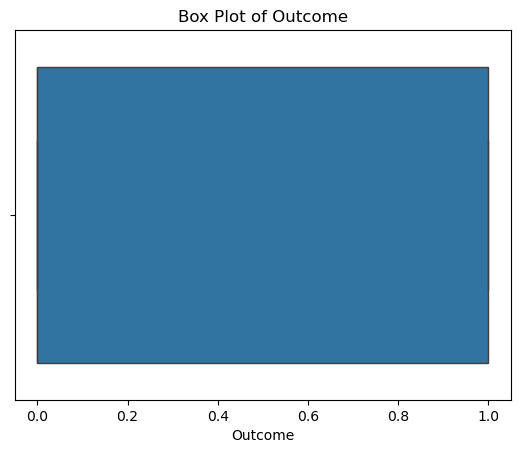

In [16]:
for i, column in enumerate(df.columns):
    plt.figure(i)  # Create a new figure for each column
    sns.boxplot(x=df[column])  # Create a box plot for the current column
    plt.title(f'Box Plot of {column}')  # Add a title to each plot
    plt.show()  # Display the plot

Look at the insulin and skin thickness there are outliers that we should take care of

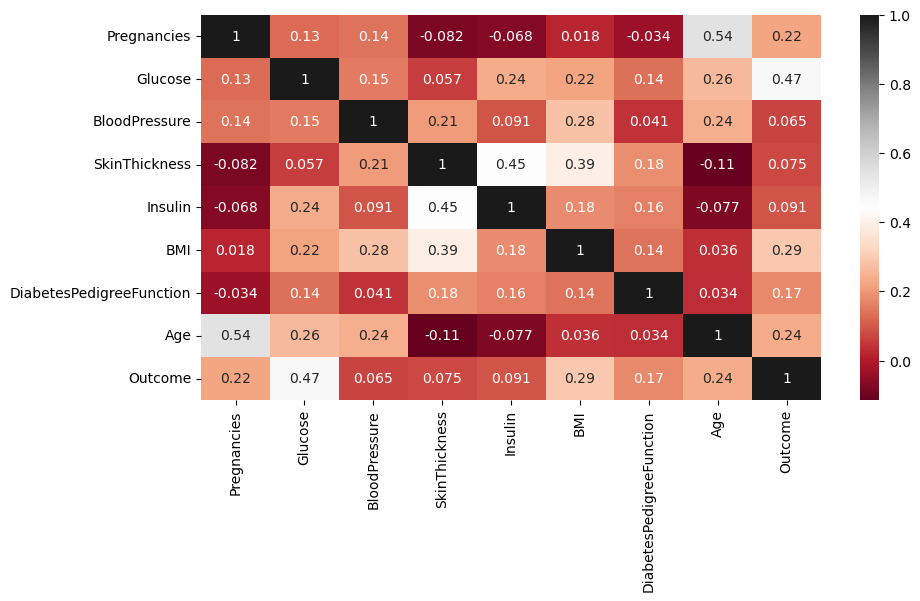

In [17]:
#Let's build a heatmap to check correlation:
plt.figure(figsize=(10,5))
heatmap= df.corr()
sns.heatmap(heatmap,cmap="RdGy",annot=True)
plt.show()

In [18]:
#We can see the moderate correlation between Glucose and outcome, also I noticed the correlation between age and number of pregnancies which is expected, overall there are surprising correlations.

/opt/anaconda3/envs/deabetes_pred/lib/python3.11/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


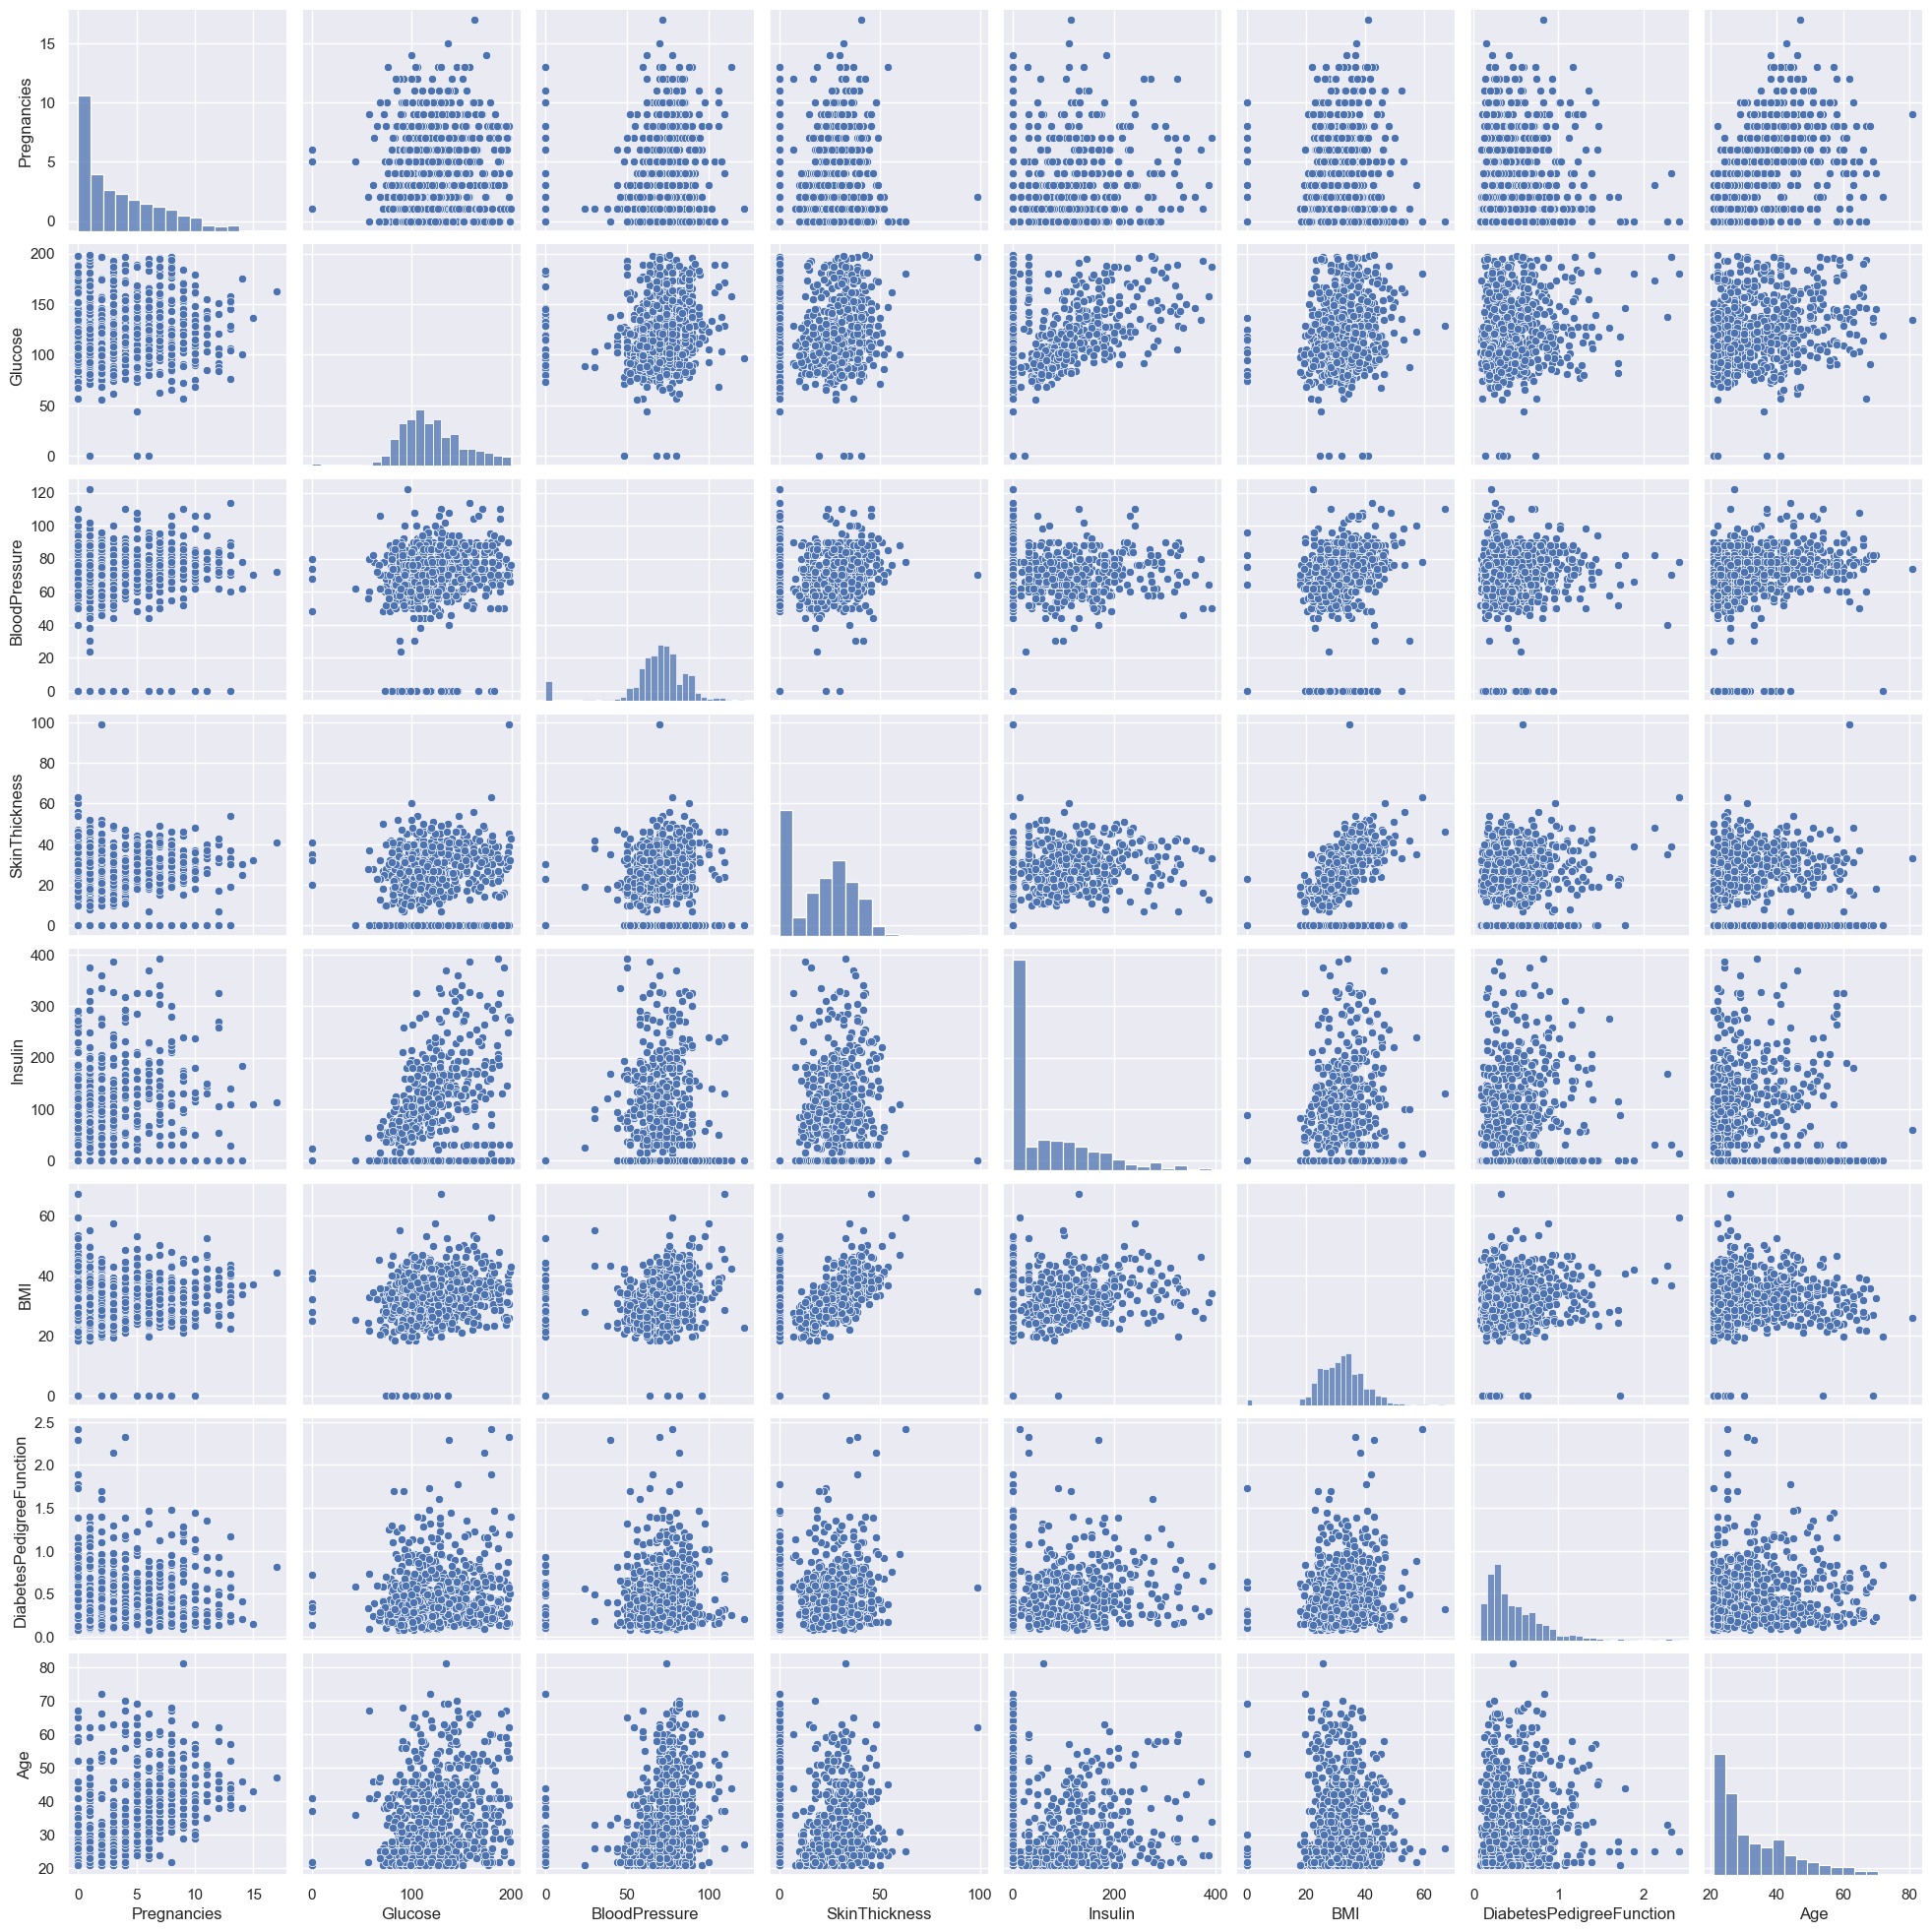

In [19]:
#scatterplot
sns.set_theme()
cols = [column for column in df.columns[:-1]]
sns.pairplot(df[cols], size = 2.5)
plt.show()

In [20]:
#There is a noticeable positive correlation between BMI and Age, BMI and Insulin, and Glucose and Insulin.
#

In [21]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0.0,33.6,0.627,50,1
1,1,85,66,29,0.0,26.6,0.351,31,0
2,8,183,64,0,0.0,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,0.0,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,0,0.0,30.1,0.349,47,1


## Modelling

Let's run all suitable ML models

#### Logistic Regression

In [42]:
#Splitting train and test sets
X = df[:]
X = df[df.columns.difference(['Outcome'])]
y = df['Outcome']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression is {round(accuracy,2)}")

Accuracy of Logistic Regression is 0.74


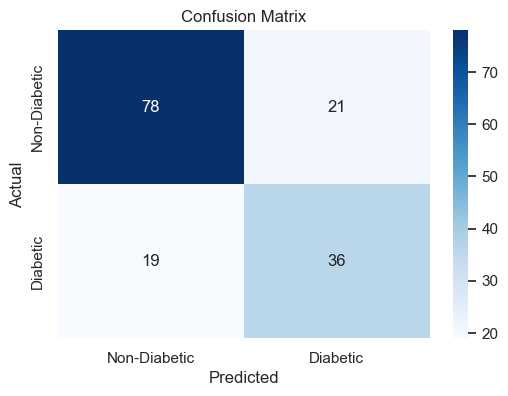

In [72]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], 
yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

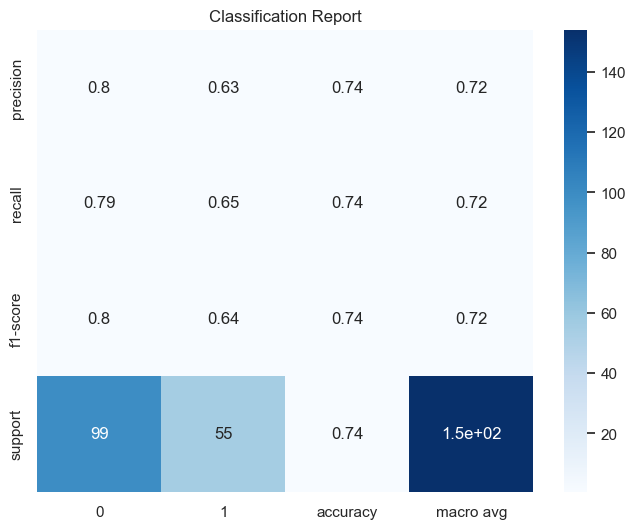

In [73]:
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()
# Plot classification report
plt.figure(figsize=(8, 6))
sns.heatmap(class_report_df.iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

## Desicion Tree

In [91]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred), 2)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

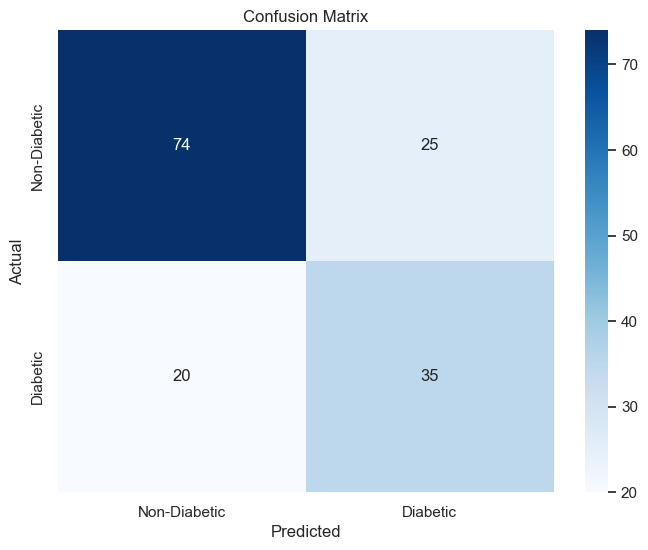

In [92]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Diabetic', 'Diabetic'], 
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

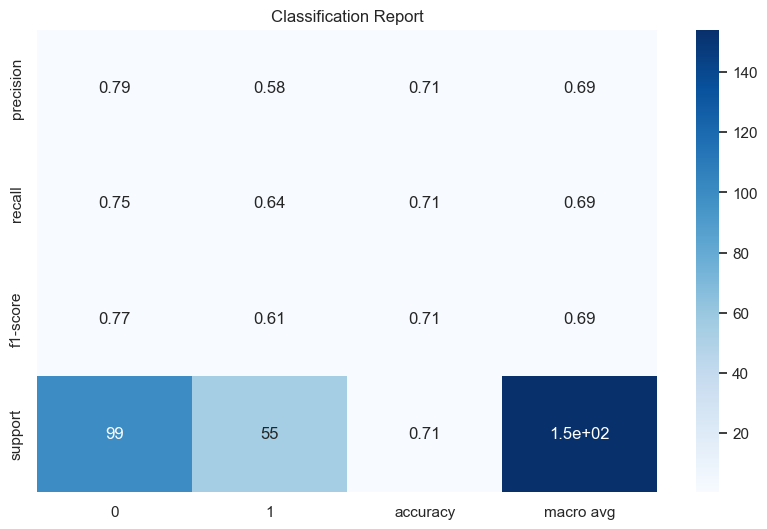

In [93]:
# Convert classification report to DataFrame
class_report_df = pd.DataFrame(class_report).transpose()

# Plot classification report using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(class_report_df.iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()